In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [41]:
df = pd.read_csv('/content/synthetic_heart_attack_data_balanced_preprocess.csv')

In [42]:
df["Device_Status"] = LabelEncoder().fit_transform(df["Device_Status"])

In [43]:
X = df.drop(columns=["Heart Attack Risk"])
y = df["Heart Attack Risk"]

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [59]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=3)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [60]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 neurons for 'Yes', 'No', 'NA'
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [63]:
history = model.fit(
    X_train, y_train_onehot,
    validation_data=(X_val, y_val_onehot),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7066 - loss: 0.5506 - val_accuracy: 0.7472 - val_loss: 0.4868
Epoch 2/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7499 - loss: 0.4787 - val_accuracy: 0.7472 - val_loss: 0.4809
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7488 - loss: 0.4809 - val_accuracy: 0.7472 - val_loss: 0.4806
Epoch 4/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7520 - loss: 0.4757 - val_accuracy: 0.7472 - val_loss: 0.4794
Epoch 5/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7504 - loss: 0.4770 - val_accuracy: 0.7472 - val_loss: 0.4793
Epoch 6/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7491 - loss: 0.4797 - val_accuracy: 0.7472 - val_loss: 0.4787
Epoch 7/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7525 - loss: 0.4770 - val_accuracy: 0.7472 - val_loss: 0.4802
Epoch 8/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7510 - loss: 0.4767 - 

In [65]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7415 - loss: 0.4844
Test Loss: 0.4804, Test Accuracy: 0.7453


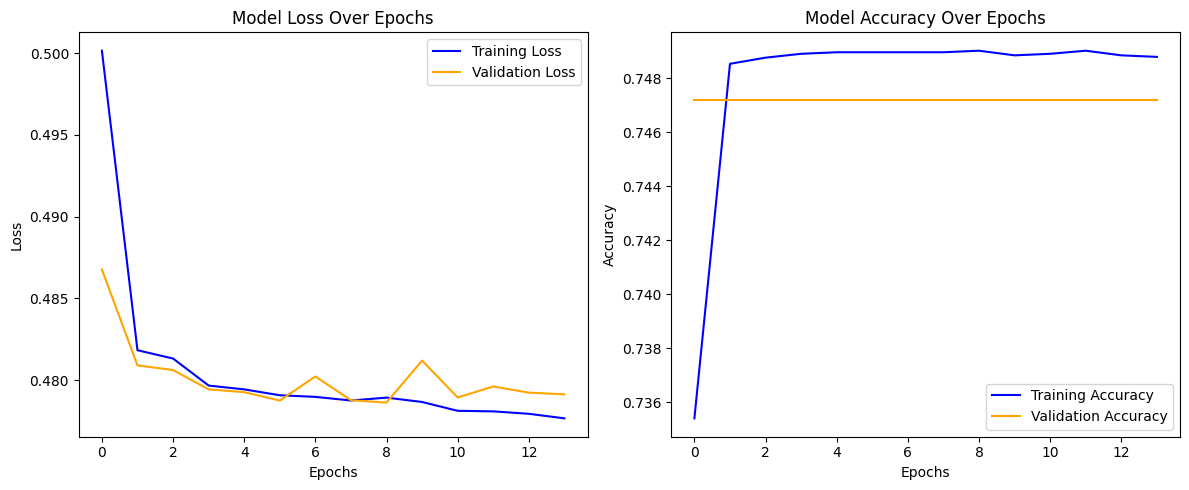

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_names = [str(cls) for cls in label_encoder_risk.classes_]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      2625
           1       1.00      1.00      1.00      1875
           2       0.65      0.80      0.72      3000

    accuracy                           0.75      7500
   macro avg       0.78      0.77      0.76      7500
weighted avg       0.75      0.75      0.74      7500

